# Занятие 8. Сборка генома

В этом ноутбуке мы реализуем алгоритм для сборки генома, основанный на поиске Эйлеровых циклов. Мы будем собирать слово по данному списку подслов длины k.

In [9]:
# В этом блоке генерируются тесты: мы нарезаем данную последовательность на подпоследовательности нужной длины

from collections import Counter

def gen_reads(genome, k):
    short_reads = set(genome[i:i+k-1] for i in range(len(genome) - k + 2))
    reads = Counter()
    for i in range(len(genome) - k + 1):
        reads[genome[i:i+k]] += 1
    return short_reads, reads

short_reads_var, reads_var = gen_reads('ATGCCGCCGATGCTG', 5)
print(f'Short reads: {short_reads_var}')
print(f'Reads: {reads_var}')

Short reads: {'GATG', 'CCGC', 'TGCT', 'CCGA', 'GCCG', 'TGCC', 'CGCC', 'GCTG', 'CGAT', 'ATGC'}
Reads: Counter({'ATGCC': 1, 'TGCCG': 1, 'GCCGC': 1, 'CCGCC': 1, 'CGCCG': 1, 'GCCGA': 1, 'CCGAT': 1, 'CGATG': 1, 'GATGC': 1, 'ATGCT': 1, 'TGCTG': 1})


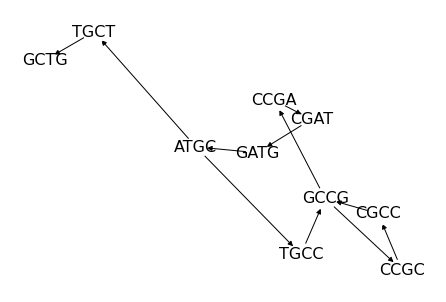

In [10]:
# В этом блоке нужно построить граф по данным наборам подслов

import networkx as nx

def gen_graph(short_reads, reads):
    G = nx.MultiDiGraph()
    G.add_nodes_from(short_reads)
    for a in short_reads:
        for b in short_reads:
            if a[1:] == b[:-1]:
                for _ in range(reads[a[:1] + b]):
                    G.add_edge(a, b)
    return G

H = gen_graph(short_reads_var, reads_var)
nx.draw(H, with_labels=True, node_size=500, node_color='white', font_size=16)

In [11]:
# В этом блоке строится Эйлеров путь в данном графе.

path_var = list(nx.algorithms.euler.eulerian_path(H))
path_var

[('ATGC', 'TGCC'),
 ('TGCC', 'GCCG'),
 ('GCCG', 'CCGC'),
 ('CCGC', 'CGCC'),
 ('CGCC', 'GCCG'),
 ('GCCG', 'CCGA'),
 ('CCGA', 'CGAT'),
 ('CGAT', 'GATG'),
 ('GATG', 'ATGC'),
 ('ATGC', 'TGCT'),
 ('TGCT', 'GCTG')]

In [5]:
# В этом блоке по данному пути нужно построить последовательность

def sequence_genome(path):
    path = list(path)
    print(path)
    ans = ''
    ans += path[0][0]
    for _, symb in path:
        ans += symb[-1:]
    return ans

sequence_genome(path_var)

[('ATGC', 'TGCC'), ('TGCC', 'GCCG'), ('GCCG', 'CCGC'), ('CCGC', 'CGCC'), ('CGCC', 'GCCG'), ('GCCG', 'CCGA'), ('CCGA', 'CGAT'), ('CGAT', 'GATG'), ('GATG', 'ATGC'), ('ATGC', 'TGCT'), ('TGCT', 'GCTG')]


'ATGCCGCCGATGCTG'

In [12]:
# В этом блоке мы вычисляем расстояние Левенштейна (разрешенные операции: добавление, удаление и замена)

def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

TTCTGGAAGATCGTTCCTCCCTGGCCTTCGGGTCTATGTCGCTACGGGGGTCGCTTATTCCTTTGCATGACTACCTGTCCTTTATTTTGGAATCGTATAGCGCCCAGTCAGTTGGCTCACTGCCCATTTGTACTCCTCTAGTCGGCTCAGAGTCACCTGCGATACAGTGGTATTTCCATGTGAGATGATCCTCTTCGCAATGTGAAAATCCACGGGACCCGATGGCACAAAGACACTGTGGGTAGAGAATCTTCAA
[4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]
[('T

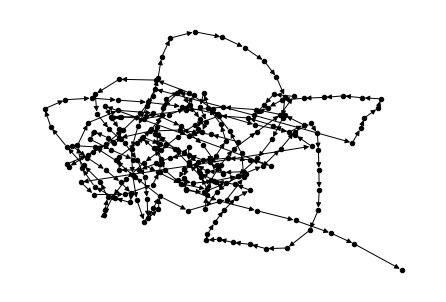

In [16]:
# В этом блоке можно потестировать решение

import random as rand

genome = ''.join(rand.choices('ACGT',k=2**8))

print(genome)

short_reads_var, reads_var = gen_reads(genome, 7)
#print(f'Short reads: {short_reads_var}')
#print(f'Reads: {reads_var}')

H = gen_graph(short_reads_var, reads_var)
nx.draw(H, with_labels=False, node_size=20, node_color='black', font_size=6)

print(sorted(dict(H.degree()).values(),reverse=True))
#print(max(dict(H.degree()).values()))

path_var = list(nx.algorithms.euler.eulerian_path(H))
genome_res = sequence_genome(path_var)
if genome == genome_res:
  print("Sucess")

#print(genome)
#print(genome_res)
print(f'Расстояние Левенштейна: {levenshteinDistance(genome,genome_res)}')